In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [3]:
ptaki = pd.read_csv('../../ptaki_dane/birds.csv')

In [4]:
ptaki.head()

,class id,filepaths,labels,data set,scientific name
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
1,0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
2,0.0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
3,0.0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
4,0.0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI


In [5]:
ptak_0_path = ptaki['filepaths'][0]
path ='../../ptaki_dane/'

ptak_0_path = path + ptak_0_path

In [6]:
ptak_0 = cv2.imread(ptak_0_path)

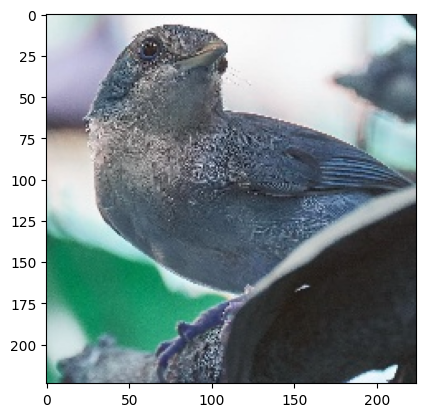

In [7]:
plt.imshow(ptak_0);

In [8]:
# dopisuje sobie sciezke do filderu w ktorym trzymam te zdjecia ptakow
ptaki['filepaths_custom'] = '../../ptaki_dane/' + ptaki['filepaths']
ptaki

,class id,filepaths,labels,data set,scientific name,filepaths_custom
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI,../../ptaki_dane/train/ABBOTTS BABBLER/001.jpg
1,0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI,../../ptaki_dane/train/ABBOTTS BABBLER/007.jpg
2,0.0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI,../../ptaki_dane/train/ABBOTTS BABBLER/008.jpg
3,0.0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI,../../ptaki_dane/train/ABBOTTS BABBLER/009.jpg
4,0.0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI,../../ptaki_dane/train/ABBOTTS BABBLER/002.jpg
...,...,...,...,...,...,...
89880,524.0,valid/BLACK BREASTED PUFFBIRD/3.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS,../../ptaki_dane/valid/BLACK BREASTED PUFFBIRD...
89881,524.0,valid/BLACK BREASTED PUFFBIRD/4.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS,../../ptaki_dane/valid/BLACK BREASTED PUFFBIRD...
89882,524.0,valid/BLACK BREASTED PUFFBIRD/1.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS,../../ptaki_dane/valid/BLACK BREASTED PUFFBIRD...
89883,524.0,valid/BLACK BREASTED PUFFBIRD/2.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS,../../ptaki_dane/valid/BLACK BREASTED PUFFBIRD...


In [9]:
ptaki[ptaki['data set'] == 'valid']

,class id,filepaths,labels,data set,scientific name,filepaths_custom
87260,0.0,valid/ABBOTTS BABBLER/1.jpg,ABBOTTS BABBLER,valid,MALACOCINCLA ABBOTTI,../../ptaki_dane/valid/ABBOTTS BABBLER/1.jpg
87261,0.0,valid/ABBOTTS BABBLER/2.jpg,ABBOTTS BABBLER,valid,MALACOCINCLA ABBOTTI,../../ptaki_dane/valid/ABBOTTS BABBLER/2.jpg
87262,0.0,valid/ABBOTTS BABBLER/3.jpg,ABBOTTS BABBLER,valid,MALACOCINCLA ABBOTTI,../../ptaki_dane/valid/ABBOTTS BABBLER/3.jpg
87263,0.0,valid/ABBOTTS BABBLER/4.jpg,ABBOTTS BABBLER,valid,MALACOCINCLA ABBOTTI,../../ptaki_dane/valid/ABBOTTS BABBLER/4.jpg
87264,0.0,valid/ABBOTTS BABBLER/5.jpg,ABBOTTS BABBLER,valid,MALACOCINCLA ABBOTTI,../../ptaki_dane/valid/ABBOTTS BABBLER/5.jpg
...,...,...,...,...,...,...
89880,524.0,valid/BLACK BREASTED PUFFBIRD/3.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS,../../ptaki_dane/valid/BLACK BREASTED PUFFBIRD...
89881,524.0,valid/BLACK BREASTED PUFFBIRD/4.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS,../../ptaki_dane/valid/BLACK BREASTED PUFFBIRD...
89882,524.0,valid/BLACK BREASTED PUFFBIRD/1.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS,../../ptaki_dane/valid/BLACK BREASTED PUFFBIRD...
89883,524.0,valid/BLACK BREASTED PUFFBIRD/2.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS,../../ptaki_dane/valid/BLACK BREASTED PUFFBIRD...


In [10]:
train = ptaki[ptaki['data set'] == 'train'].sample(20000, random_state=42)
test = ptaki[ptaki['data set'] == 'test']
valid = ptaki[ptaki['data set'] == 'valid']

In [11]:
train['filepaths_custom']

55036        ../../ptaki_dane/train/NICOBAR PIGEON/081.jpg
267           ../../ptaki_dane/train/ABBOTTS BOOBY/105.jpg
35177     ../../ptaki_dane/train/FIORDLAND PENGUIN/058.jpg
17911     ../../ptaki_dane/train/BURCHELLS COURSER/018.jpg
7168     ../../ptaki_dane/train/AUSTRALASIAN FIGBIRD/09...
                               ...                        
47886                   ../../ptaki_dane/train/IWI/054.jpg
3645          ../../ptaki_dane/train/AMERICAN ROBIN/66.jpg
11925       ../../ptaki_dane/train/BLACK FRANCOLIN/045.jpg
43644              ../../ptaki_dane/train/HAWFINCH/157.jpg
67731          ../../ptaki_dane/train/RUDDY SHELDUCK/5.jpg
Name: filepaths_custom, Length: 20000, dtype: object

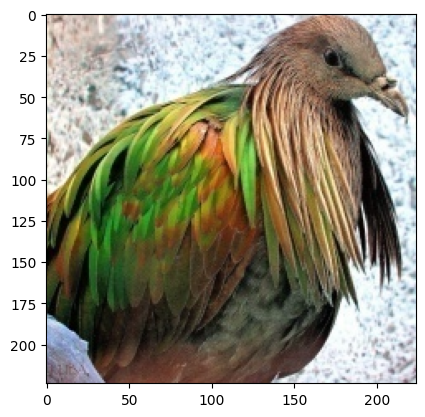

In [12]:
a = cv2.imread('../../ptaki_dane/train/NICOBAR PIGEON/081.jpg')
plt.imshow(a)

In [10]:
train_dir = '../../ptaki_dane/train'
filepaths = []
labels = []

folds = os.listdir(train_dir)
for fold in folds:
    foldpath = os.path.join(train_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis= 1)

In [11]:
test_dir = '../../ptaki_dane/test'
filepaths = []
labels = []

folds = os.listdir(test_dir)
for fold in folds:
    foldpath = os.path.join(test_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
test_df = pd.concat([Fseries, Lseries], axis= 1)

In [12]:
valid_dir = '../../ptaki_dane/valid'
filepaths = []
labels = []

folds = os.listdir(valid_dir)
for fold in folds:
    foldpath = os.path.join(valid_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
valid_df = pd.concat([Fseries, Lseries], axis= 1)

In [13]:
# crobed image size
batch_size = 32
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()
train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)
valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 84635 validated image filenames belonging to 525 classes.
Found 2625 validated image filenames belonging to 525 classes.
Found 2625 validated image filenames belonging to 525 classes.


In [14]:
classes = list(train_gen.class_indices.keys())

images, labels = next(train_gen)

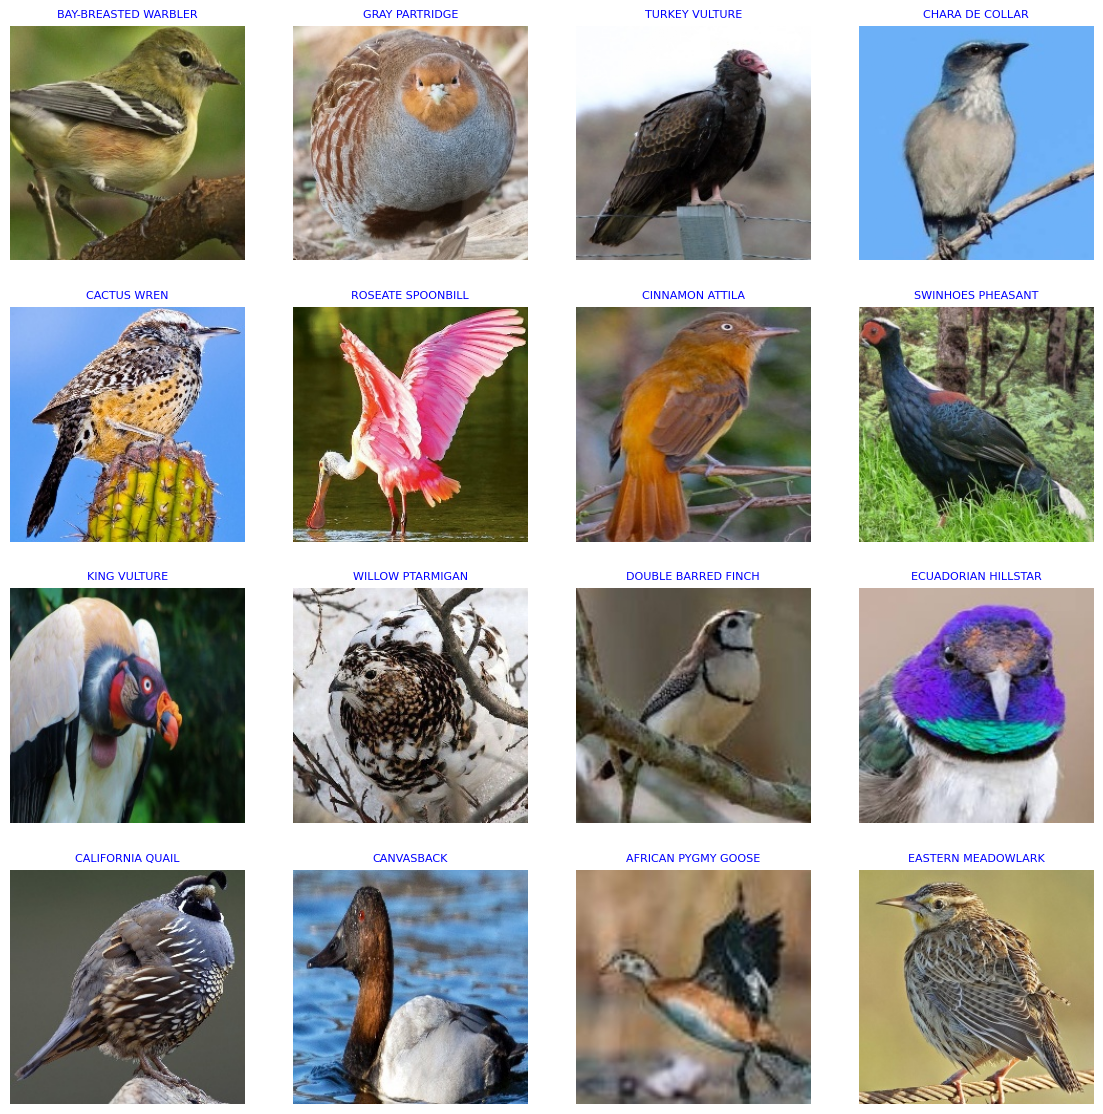

In [18]:
plt.figure(figsize= (14,14))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 1)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 8)
    plt.axis('off')
plt.show()

In [19]:
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')
# base_model.trainable = False
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    tf.keras.layers.Dense(256, kernel_regularizer= tf.keras.regularizers.l2(l= 0.016), activity_regularizer= tf.keras.regularizers.l1(0.006),
                bias_regularizer= tf.keras.regularizers.l1(0.006), activation= 'relu'),
    tf.keras.layers.Dropout(rate= 0.45, seed= 123),
    tf.keras.layers.Dense(class_count, activation= 'softmax')
])

model.compile(tf.keras.optimizers.Adam(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 1280)              4049571   
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1280)              5120      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 525)               134925    
                                                                 
Total params: 4517552 (17.23 MB)
Trainable params: 44729

In [20]:
batch_size = 32   # set batch size for training
epochs =  10  # number of all epochs in training
history = model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen, 
                    validation_steps= None, shuffle= False)

Epoch 1/10
2645/2645 [==============================] - 7694s 3s/step - loss: 3.8611 - accuracy: 0.5540 - val_loss: 2.0276 - val_accuracy: 0.8450
Epoch 2/10
2645/2645 [==============================] - 7700s 3s/step - loss: 2.2162 - accuracy: 0.7692 - val_loss: 1.7347 - val_accuracy: 0.8693
Epoch 3/10
2645/2645 [==============================] - 7690s 3s/step - loss: 1.8933 - accuracy: 0.8141 - val_loss: 1.5413 - val_accuracy: 0.9070
Epoch 4/10
2645/2645 [==============================] - 7895s 3s/step - loss: 1.6676 - accuracy: 0.8457 - val_loss: 1.3615 - val_accuracy: 0.9238
Epoch 5/10
2645/2645 [==============================] - 7907s 3s/step - loss: 1.4944 - accuracy: 0.8638 - val_loss: 1.2136 - val_accuracy: 0.9272
Epoch 6/10
2645/2645 [==============================] - 7956s 3s/step - loss: 1.3411 - accuracy: 0.8810 - val_loss: 1.1236 - val_accuracy: 0.9337
Epoch 7/10
2645/2645 [==============================] - 7967s 3s/step - loss: 1.1881 - accuracy: 0.8952 - val_loss: 0.9983 -

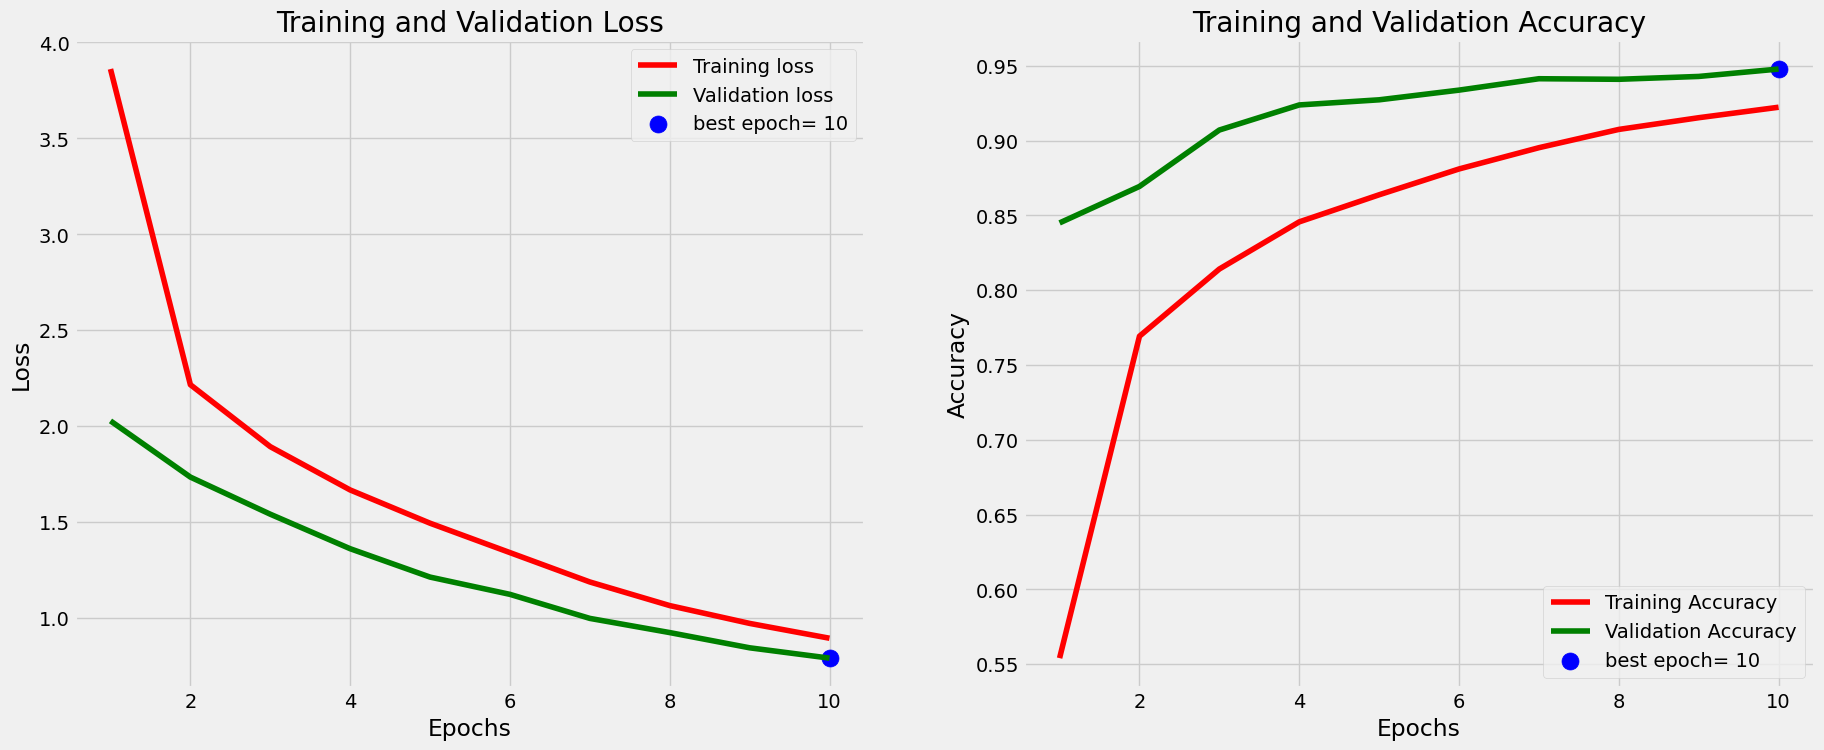

In [22]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'
# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show()

In [23]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

35/35 [==============================] - 24s 691ms/step - loss: 0.7109 - accuracy: 0.9643
Train Loss:  0.7299737930297852
Train Accuracy:  0.9660714268684387
--------------------
Validation Loss:  0.8099289536476135
Validation Accuracy:  0.9419642686843872
--------------------
Test Loss:  0.7109119892120361
Test Accuracy:  0.9642857313156128


In [24]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

C:\Users\48795\AppData\Local\Temp\ipykernel_396692\2815406075.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_gen)


In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools

In [32]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

                               precision    recall  f1-score   support

              ABBOTTS BABBLER       1.00      1.00      1.00         5
                ABBOTTS BOOBY       1.00      0.60      0.75         5
   ABYSSINIAN GROUND HORNBILL       1.00      1.00      1.00         5
        AFRICAN CROWNED CRANE       1.00      1.00      1.00         5
       AFRICAN EMERALD CUCKOO       1.00      1.00      1.00         5
            AFRICAN FIREFINCH       1.00      0.80      0.89         5
       AFRICAN OYSTER CATCHER       1.00      1.00      1.00         5
        AFRICAN PIED HORNBILL       1.00      1.00      1.00         5
          AFRICAN PYGMY GOOSE       1.00      1.00      1.00         5
                    ALBATROSS       1.00      1.00      1.00         5
               ALBERTS TOWHEE       1.00      1.00      1.00         5
         ALEXANDRINE PARAKEET       1.00      1.00      1.00         5
                ALPINE CHOUGH       0.83      1.00      0.91         5
     

In [27]:
#Save the model
model.save('model.h5')

c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [6]:
loaded_model = tf.keras.models.load_model('model.h5', compile=False)
loaded_model.compile(tf.keras.optimizers.Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [2]:
from PIL import Image

In [31]:
image_path = '../../ptaki_dane/google_search/66.jpg'
image = Image.open(image_path)

# Preprocess the image
img = image.resize((224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = loaded_model.predict(img_array)
class_labels = classes
score = tf.nn.softmax(predictions[0])
print(f"{class_labels[tf.argmax(score)]}")

1/1 [==============================] - 0s 47ms/step
PALM NUT VULTURE
